In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
cc = pd.read_csv('creditcard.csv')
cc.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
cc.shape

(284807, 31)

In [5]:
cc.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
columnas = cc.columns.tolist()
excluir = ['Time','Amount','Class']
organizada = ['Time','Amount','Class'] + [col for col in  columnas if col not in excluir]
cc = cc[organizada]
cc

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.77,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,172787.0,24.79,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,172788.0,67.88,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,172788.0,10.00,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [7]:
cc.describe(include='all')

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,88.349619,0.001727,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,...,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16
std,47488.145955,250.120109,0.041527,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,54201.500000,5.600000,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,84692.000000,22.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,139320.500000,77.165000,0.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,172792.000000,25691.160000,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [8]:
cc.isna().sum().sum()

0

Text(0.5, 1.0, 'Fraude')

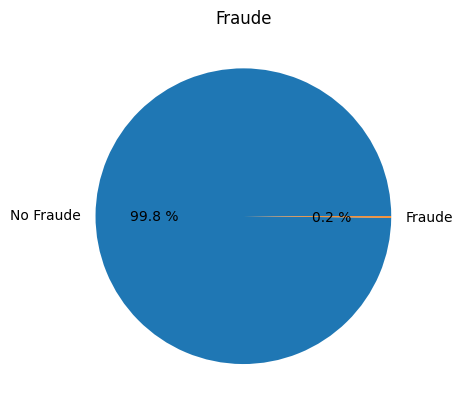

In [9]:
plt.pie(cc.Class.value_counts(),labels=['No Fraude', 'Fraude'], autopct="%0.1f %%")
plt.title('Fraude')

In [10]:
cc.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [11]:
fraude= cc[cc['Class'] == 1]
cantidad = len(fraude)
print(fraude.head(3))
print(f'Hay una cantidad de {cantidad} fraudes')

        Time  Amount  Class        V1        V2        V3        V4        V5  \
541    406.0    0.00      1 -2.312227  1.951992 -1.609851  3.997906 -0.522188   
623    472.0  529.00      1 -3.043541 -3.157307  1.088463  2.288644  1.359805   
4920  4462.0  239.93      1 -2.303350  1.759247 -0.359745  2.330243 -0.821628   

            V6        V7  ...       V19       V20       V21       V22  \
541  -1.426545 -2.537387  ...  0.416956  0.126911  0.517232 -0.035049   
623  -1.064823  0.325574  ...  0.283345  2.102339  0.661696  0.435477   
4920 -0.075788  0.562320  ... -1.334441 -0.430022 -0.294166 -0.932391   

           V23       V24       V25       V26       V27       V28  
541  -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276  
623   1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764  
4920  0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  

[3 rows x 31 columns]
Hay una cantidad de 492 fraudes


In [12]:
fraude.describe()

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,80746.806911,122.211321,1.0,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667
std,47835.365138,256.683288,0.0,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,...,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291
min,406.000000,0.000000,1.0,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,...,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290
25%,41241.500000,1.000000,1.0,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,...,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868
50%,75568.500000,9.250000,1.0,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,...,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344
75%,128483.000000,105.890000,1.0,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,...,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152
max,170348.000000,2125.870000,1.0,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,...,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364


In [13]:
no_fraude= cc[cc['Class'] == 0]
no_fraude

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.77,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,172787.0,24.79,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,172788.0,67.88,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,172788.0,10.00,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [14]:
pd.concat([fraude.Amount.describe(), no_fraude.Amount.describe(),
           no_fraude.Time.describe(),no_fraude.Time.describe()], axis=1)

,Amount,Amount,Time,Time
count,492.000000,284315.000000,284315.000000,284315.000000
mean,122.211321,88.291022,94838.202258,94838.202258
std,256.683288,250.105092,47484.015786,47484.015786
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.650000,54230.000000,54230.000000
50%,9.250000,22.000000,84711.000000,84711.000000
75%,105.890000,77.050000,139333.000000,139333.000000
max,2125.870000,25691.160000,172792.000000,172792.000000


In [15]:
columnas_numeros = cc.select_dtypes(include=['float64'])
asi = columnas_numeros.skew()
asi

Time      -0.035568
Amount    16.977724
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
dtype: float64

In [16]:
corr=cc.corr()
corr[['Class']].sort_values(by = 'Class',ascending = False)


,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


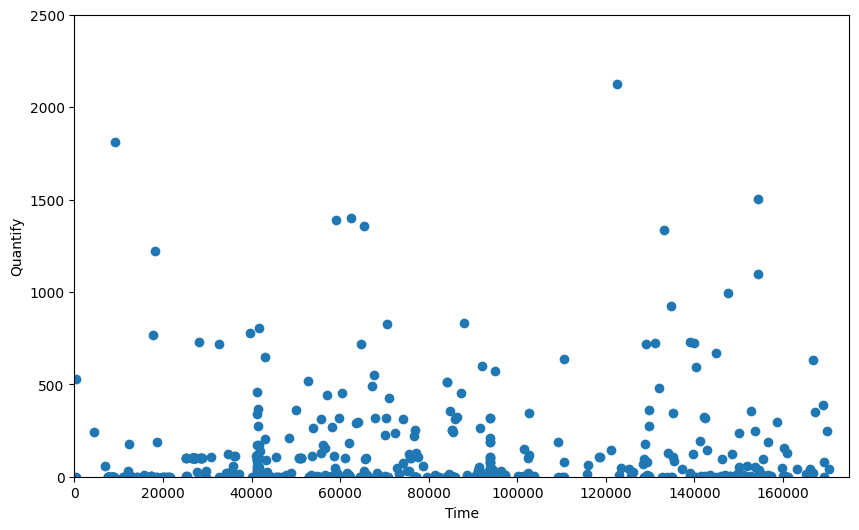

In [29]:

plt.figure(figsize=(10,6))
plt.scatter(fraude['Time'],fraude['Amount']) 
plt.xlabel('Time')
plt.ylabel('Quantify')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

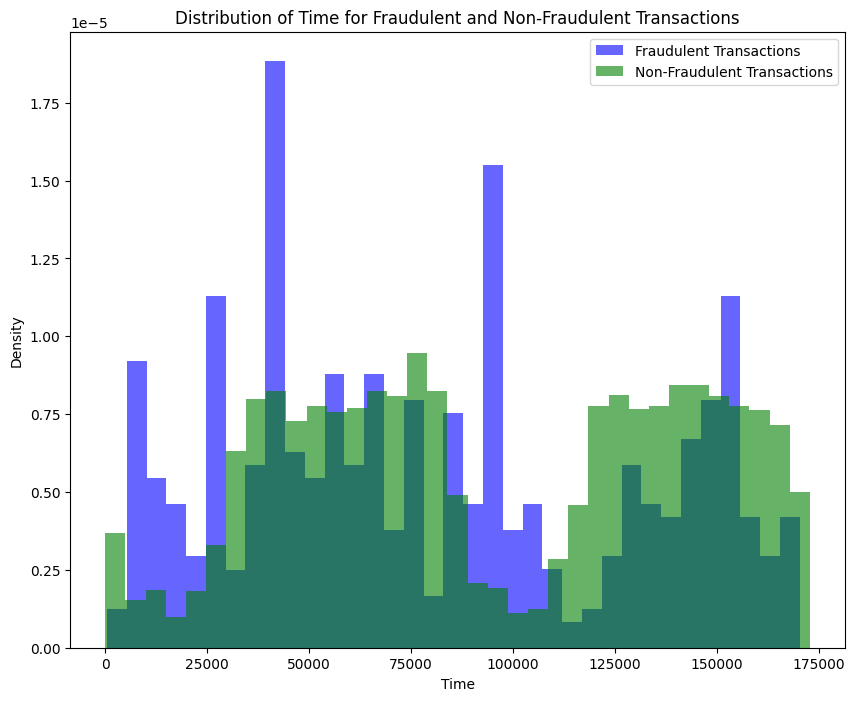

In [18]:
plt.figure(figsize=(10, 8))
plt.hist(cc[cc.Class == 1].Time, bins=35, color='blue', alpha=0.6, label="Fraudulent Transactions", density=True)
plt.hist(cc[cc.Class == 0].Time, bins=35, color='green', alpha=0.6, label="Non-Fraudulent Transactions", density=True)
plt.legend()
plt.title("Distribution of Time for Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Time")
plt.ylabel("Density")
plt.show()

In [19]:
cc.head(3)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752


<Axes: >

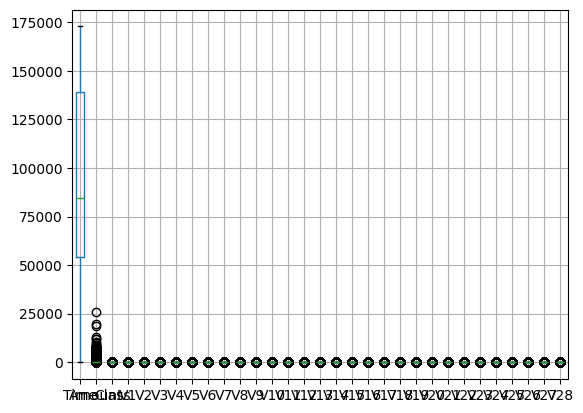

In [20]:
cc.boxplot()

In [21]:
cc_test=cc.copy()
cc_test.head(3)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752


In [22]:
X = cc_test.drop('Class', axis= 1)
y = cc_test.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (213605, 30)
y_train: (213605,)
X_test: (71202, 30)
y_test: (71202,)


In [24]:

scores_dict = {}
def algortimo (model,X_train,y_train,X_test):
    model.fit(X_train, y_train)
    
    Yt_pred = model.predict(X_train)
    print('Prediccion del conjunto de entrenamiento')
    Y_train=classification_report(y_train, Yt_pred, target_names = ['No Fraud', 'Fraud'])
    print(Y_train)
    confusion_matrix_train = confusion_matrix(y_train, Yt_pred)
    print("Matriz de Confusión del Conjunto de Entrenamiento:")
    print(confusion_matrix_train,'\n')
   
    
    Yts_pred = model.predict(X_test)
    print('Prediccion del conjunto de test')
    Y_test=classification_report(y_test, Yts_pred, target_names = ['No Fraud', 'Fraud'])
    print(Y_test)
    confusion_matrix_test = confusion_matrix(y_test, Yts_pred)
    print("Matriz de Confusión del Conjunto de Test:")
    print(confusion_matrix_test)
    
    
    scores_dict[model] = {
        'Train': f1_score(y_train,Yt_pred),
        'Test': f1_score(y_test, Yts_pred),
        }
    return Yts_pred, scores_dict
   

In [25]:
modelo = LogisticRegression(max_iter=1000)
y_test_pred= algortimo(modelo,X_train, y_train, X_test)


Prediccion del conjunto de entrenamiento
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    213233
       Fraud       0.86      0.62      0.72       372

    accuracy                           1.00    213605
   macro avg       0.93      0.81      0.86    213605
weighted avg       1.00      1.00      1.00    213605

Matriz de Confusión del Conjunto de Entrenamiento:
[[213195     38]
 [   140    232]] 

Prediccion del conjunto de test
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     71082
       Fraud       0.87      0.60      0.71       120

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

Matriz de Confusión del Conjunto de Test:
[[71071    11]
 [   48    72]]


Based on the analysis, it can be observed that for the test set, this model detected 232 out of 372 frauds with a 0.62% effectiveness. In the case of the training set, out of 120 instances, it identified 72 with a 0.6% effectiveness.

In [26]:
modelo = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
y_test_pred= algortimo(modelo,X_train, y_train, X_test)

Prediccion del conjunto de entrenamiento
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    213233
       Fraud       0.94      0.83      0.88       372

    accuracy                           1.00    213605
   macro avg       0.97      0.91      0.94    213605
weighted avg       1.00      1.00      1.00    213605

Matriz de Confusión del Conjunto de Entrenamiento:
[[213212     21]
 [    65    307]] 

Prediccion del conjunto de test
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     71082
       Fraud       0.86      0.81      0.83       120

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Matriz de Confusión del Conjunto de Test:
[[71066    16]
 [   23    97]]


This model detected 307 out of 372 frauds with a 0.83% effectiveness. In the case of the training set, out of 120 instances, it identified 97 with a 0.81% effectiveness.

In [27]:
modelo = GaussianNB(var_smoothing=1e-9)
y_test_pred= algortimo(modelo,X_train, y_train, X_test)

Prediccion del conjunto de entrenamiento
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00    213233
       Fraud       0.15      0.65      0.24       372

    accuracy                           0.99    213605
   macro avg       0.57      0.82      0.62    213605
weighted avg       1.00      0.99      1.00    213605

Matriz de Confusión del Conjunto de Entrenamiento:
[[211851   1382]
 [   132    240]] 

Prediccion del conjunto de test
              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     71082
       Fraud       0.14      0.63      0.24       120

    accuracy                           0.99     71202
   macro avg       0.57      0.81      0.62     71202
weighted avg       1.00      0.99      1.00     71202

Matriz de Confusión del Conjunto de Test:
[[70633   449]
 [   44    76]]


We can observed that in the case of the test set, this model of 372 frauds, detected 240 with 0.65% effectiveness, in the case of the test set, of 120 detected 76 with 0.63% effectiveness.

<Axes: >

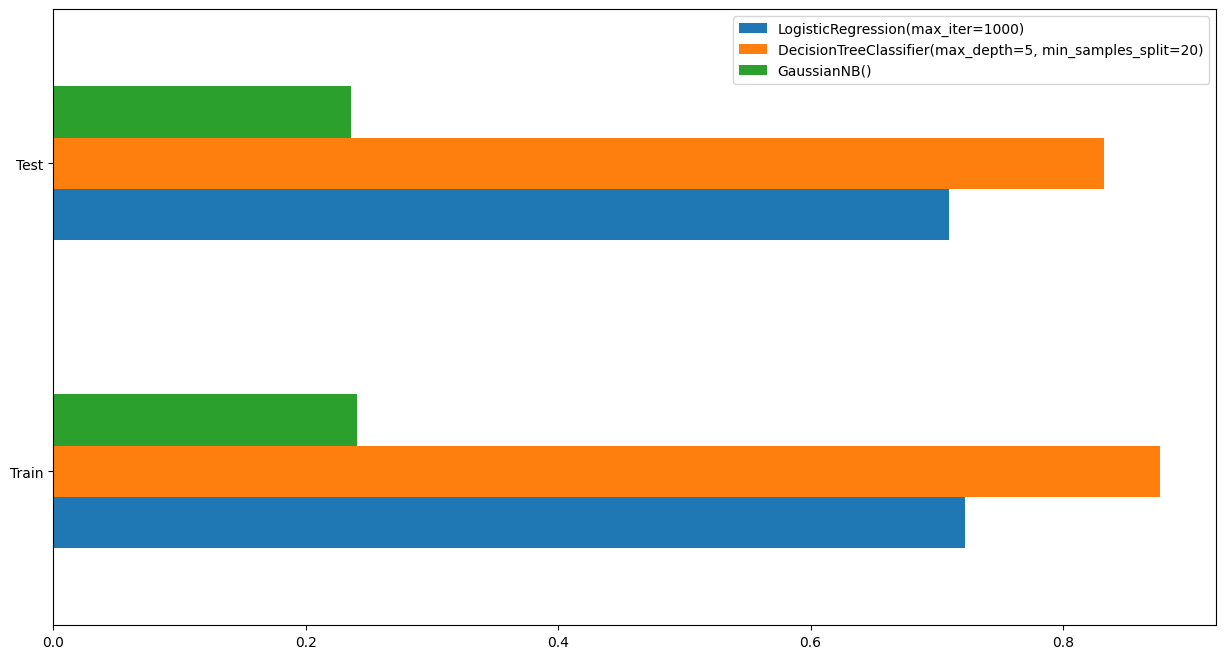

In [28]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

It is concluded that the model is the decision tree for this project based on some previous evaluation of the models.